<a href="https://colab.research.google.com/github/luiz826/analise_de_dados/blob/main/Projeto_Introdu%C3%A7%C3%A3o_a_Programa%C3%A7%C3%A3o%20-%20Analise%20dos%20dados%20do%20Enem%202019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

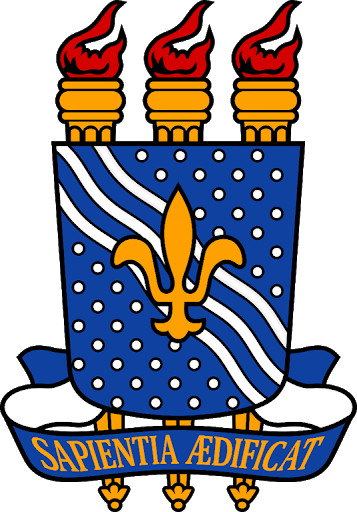

            Universidade Federal da Paraíba
                Centro de Informática
          Departamento de Computação Científica
       Ciência de Dados e Inteligência Artificial
               Introdução à Programação

> Discente: Caio Lucas da Silva Chacon

> Discente: Luiz Fernando Costa dos Santos

> Docente: Bruno Jeffersson de Sousa Pessoa





# ANALISE DE DADOS DOS MICRODADOS DO ENEM 2019

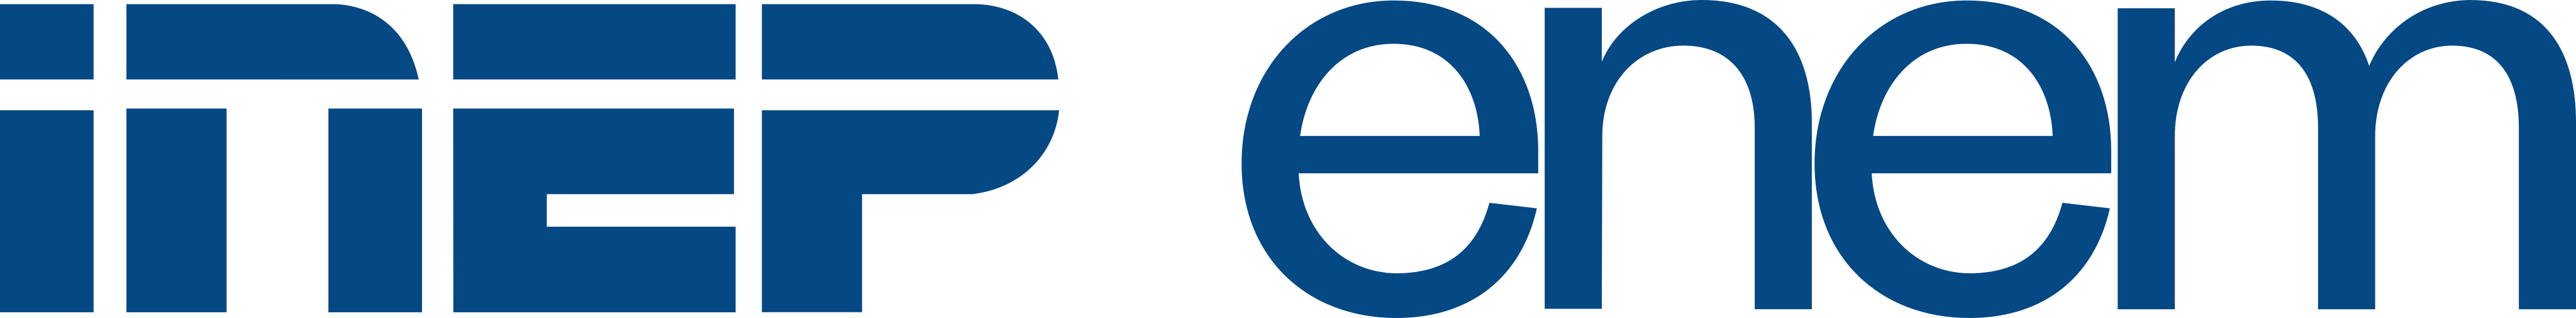

### Introdução

O Exame Nacional do Ensino Médio (Enem) é uma prova realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), autarquia vinculada ao Ministério da Educação do Brasil.

Além de ser o segundo maior exame do mundo, ele é o maior exame do Brasil, e sua nota é utilizada para avaliar a qualidade do ensino médio no país. Seu resultado também serve para acesso ao ensino superior em universidades públicas brasileiras, através do Sistema de Seleção Unificada (SiSU), assim como em algumas universidades no exterior.

Além disso, os participantes também podem fazer a prova para ganhar bolsas integrais ou parciais em Universidades particulares através do Programa Universiadde para Todos (ProUni) ou para obter financiamento estudantil através do Fundo de Financiamento ao Estudante do Ensino Superior (Fies).

O ENEM recebe tanta atenção, que o Brasil praticamente para nos dias em que a prova ocorre: em várias cidades do país, as frotas de ônibus são adaptadas, guardas trânsito são mobilizados e até shows são feitos para os "atrasados do ENEM".

Assim, dada a tremenda importância dessa prova, se torna pertinente analisar os resultados e observar se encontramos algum padrão nas respostas, pois o ENEM é um acaba sendo um reflexo da nossa sociedade. Dessa forma, iremos analisar os dados do ENEM 2019 com alguns objetivos em mente, são eles:


### Objetivos

Analisar quais os fatores que mais influenciam na nota:
* Descobrir a importância da renda para a nota dos alunos;
* Descobrir se a Cor/Raça dos indivíduos é relevante para a nota;
* Descobrir se o tipo de escola em que o aluno concluiu o ensino médio possui influencia
 Analisar as diferenças e relações entre os alunos que tiraram 1000 e 0 na redação

Após explorar esses dados, vamos fazer também um recorte da Paraíba e entender um pouco sobre quem passaria no curso de CDIA.:
* Descobrir nota geral (por média) e a nota de corte de CDIA. NOTA GERAL CDIA = 693.10;

Queremos também fazer outras duas análises, que julgamos pertinentes
* Provar estatísticamente que as notas de matemática e redação são as mais importantes


### Montando o ambiente para realizar o pré-processamento

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importação de algumas bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

#### Dicionário de funções criadas

In [ ]:
def mapa_de_calor(df, colunas, tam):
  plt.figure(figsize=tam)
  df_corr = df[colunas].corr()
  sns.heatmap(df_corr.corr(), cmap='Blues', annot=True, fmt=".2f") 

def transforma_num(df, coluna):
  coluna_categorica =  df[coluna].apply(lambda x: int(x.replace('A', '1').replace('B', '2').replace('C', '3').replace('D', '4').replace('E', '5').replace('F', '6').replace('G', '7').replace('H', '8').\
                                                            replace('I', '9').replace('J', '10').replace('K', '11').replace('L', '12').replace('M', '13').replace('N', '14').replace('O', '15').replace('P', '16').replace('Q', '17')))
  return coluna_categorica


def calcula_moda(df, coluna):
  return df[coluna].mode().values[0]


def plota_diperssao(df, coluna1, coluna2, title='Gráfico de Disperssão', color='blue', figsize=(8, 4), xlim=(500, 1000), ylim=(600, 1000)):
  plt.figure(figsize=(figsize))
  plt.scatter(df[coluna1], df[coluna2], color=color)
  plt.xlabel(coluna1)
  plt.ylabel(coluna2)
  plt.title(title)
  plt.xlim(xlim)
  plt.ylim(ylim)

def plota_hist_por_raca(col):
  plt.hist(branco[col], alpha=0.5, color="red", bins=100, label="Branco")
  plt.hist(pardo[col], alpha=0.5, color="blue", bins=100, label="Pardo")
  plt.hist(preto[col], alpha=0.5, color="black", bins=100, label="Preto")
  plt.hist(amarelo[col], alpha=0.5, color="yellow", bins=100, label="Amarelo")
  plt.hist(indigena[col], alpha=0.5, color="green", bins=100, label="Indigena")
  plt.grid(axis='y')
  plt.title(col)
  plt.xlim(0, 1000)
  plt.legend()
  plt.show()


### Pré-processamento dos Dados

Obtivemos estes dados do portal de dados abertos do INEP, disponível em: <https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem>

Este foi o primeiro dataset importado. Escolhemos apenas algumas colunas (estrategicamente), pois o colab não suportou todas as 5095270 linhas e 136 colunas.

In [ ]:
# df = pd.read_csv("/content/drive/My Drive/MICRODADOS_ENEM_2019.csv", 
#                   encoding="iso-8859-1", sep=";", 
#                   usecols=["NO_MUNICIPIO_RESIDENCIA",
#                            "SG_UF_RESIDENCIA",
#                            "NU_IDADE", 
#                            "TP_SEXO",
#                            "TP_COR_RACA",
#                            "NO_MUNICIPIO_NASCIMENTO",
#                            "SG_UF_NASCIMENTO",
#                            'TP_ST_CONCLUSAO', 
#                            'TP_ANO_CONCLUIU', 
#                            'TP_ESCOLA', 
#                            'TP_ENSINO',
#                            'IN_TREINEIRO',

#                            "CO_ESCOLA",
#                            "NO_MUNICIPIO_ESC",
#                            "SG_UF_ESC",
#                            "TP_DEPENDENCIA_ADM_ESC",
#                            "TP_LOCALIZACAO_ESC",
#                            "TP_SIT_FUNC_ESC",

#                            'NO_MUNICIPIO_PROVA',
#                            'SG_UF_PROVA',

#                            'TP_PRESENCA_CN',
#                            'TP_PRESENCA_CH',
#                            'TP_PRESENCA_LC',
#                            'TP_PRESENCA_MT',
#                            "CO_PROVA_CN",
#                            "CO_PROVA_CH",
#                            "CO_PROVA_LC",
#                            "CO_PROVA_MT",
#                            'NU_NOTA_CN',
#                            'NU_NOTA_CH',
#                            'NU_NOTA_LC',
#                            'NU_NOTA_MT',

#                            'TP_STATUS_REDACAO',
#                            'NU_NOTA_COMP1',
#                            'NU_NOTA_COMP2',
#                            'NU_NOTA_COMP3',
#                            'NU_NOTA_COMP4',
#                            'NU_NOTA_COMP5',
#                            'NU_NOTA_REDACAO',

#                            'Q001',
#                            'Q002',
#                            'Q003',
#                            'Q004',
#                            'Q005',
#                            'Q006',
#                            'Q008',
#                            'Q019',
#                            'Q022',
#                            'Q024',
#                            'Q025'])


Os próximos códigos serviram para filtrar o dataset. No final, deixamos apenas os participantes que **não** são **treineiros** e que fizeram os **dois** dias de **prova**

Além disso, adicionamos a coluna "NU_NOTA_GERAL", que é referente a nota geral do participante. Ela foi calculada a partir da média das 5 notas obtidas. E utilizamos uma função para transformar dados do tipo categorico (representados por letras do alfabeto) em dados categoricos numericos. 

In [ ]:
#Retirando os participantes que não fizeram algum dia de prova

# df_aux = df.loc[df["NU_NOTA_MT"].isnull() == False]
# df_aux = df_aux.loc[df_aux["NU_NOTA_LC"].isnull() == False]
# df_aux = df_aux.loc[df_aux["NU_NOTA_REDACAO"].isna() == False]

#Deixando apenas os participantes que não são treineiros

# df_aux = df_aux.query("IN_TREINEIRO == 0")

In [ ]:
#Criando uma coluna com a nota geral

# df_aux['NU_NOTA_GERAL'] = (df_aux['NU_NOTA_CH'] + df_aux['NU_NOTA_REDACAO'] + df_aux['NU_NOTA_MT'] + df_aux['NU_NOTA_CN'] + df_aux['NU_NOTA_LC'])/5

In [ ]:
#Verificando se existe algum dado faltante dentre as notas

# df_aux[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]].isna().any()

NU_NOTA_CN         False
NU_NOTA_CH         False
NU_NOTA_MT         False
NU_NOTA_LC         False
NU_NOTA_REDACAO    False
dtype: bool

In [ ]:
#Para garantir que iríamos conseguir realizar operações com os questionários socioeconomicos
#transformamos os valores strings em inteiros

#for i in ["Q001",	"Q002", "Q003",	"Q004",	"Q006",	"Q008",	"Q019", "Q022",	"Q024","Q025"]:
#  df_aux[i] = transforma_num(df_aux,i)

In [ ]:
#df_aux.head()
#df_aux.to_csv("/content/drive/My Drive/MICRODADOS_ENEM_2019_CORTADO.csv")

OBS: Comentamos as celulas da seção "Pré-processamento dos Dados", por uma questão de economia de memória e processamento do Google Colab

In [ ]:
df_final = pd.read_csv("/content/drive/My Drive/MICRODADOS_ENEM_2019_CORTADO.csv")
df_final = df_final.drop(columns=["Unnamed: 0"])

In [ ]:
df_final

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q019,Q022,Q024,Q025,NU_NOTA_GERAL
0,Santarém,PA,21,M,3,NaN,NaN,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Santarém,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,1.0,160.0,160.0,160.0,140.0,160.0,780.0,4,5,1,1,7,2,2,3,4,2,1,517.06
1,Paragominas,PA,18,F,1,Paragominas,PA,2,0,3,1.0,0,15230023.0,Paragominas,PA,4.0,1.0,1.0,Paragominas,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,1.0,140.0,120.0,120.0,140.0,120.0,640.0,8,5,1,4,3,3,5,4,4,3,2,581.40
2,Ananindeua,PA,31,M,1,Belém,PA,1,7,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Belém,PA,1,1,1,1,506.0,508.0,512.0,517.0,522.0,592.6,582.0,605.3,1.0,120.0,200.0,140.0,120.0,0.0,580.0,3,3,3,4,5,3,2,2,4,1,1,576.38
3,Marabá,PA,30,F,3,Marabá,PA,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Marabá,PA,1,1,1,1,504.0,510.0,513.0,516.0,407.4,480.1,464.3,581.5,1.0,80.0,100.0,80.0,80.0,20.0,360.0,2,2,1,1,4,3,2,2,2,1,2,458.66
4,Belém,PA,26,F,3,Baião,PA,2,0,2,1.0,0,15042626.0,Belém,PA,2.0,1.0,1.0,Belém,PA,1,1,1,1,504.0,508.0,512.0,516.0,369.7,398.2,395.6,473.8,1.0,120.0,120.0,120.0,120.0,0.0,480.0,2,2,2,2,4,2,2,2,2,1,1,423.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174303,Ribeirão das Neves,MG,22,F,3,Divisópolis,MG,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Ribeirão das Neves,MG,1,1,1,1,503.0,510.0,513.0,515.0,464.4,415.8,510.5,473.0,1.0,120.0,100.0,80.0,120.0,60.0,480.0,2,5,1,2,2,5,2,2,3,1,2,468.74
3174304,Salvador,BA,27,F,2,Salvador,BA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Salvador,BA,1,1,1,1,505.0,507.0,511.0,518.0,486.7,457.8,506.7,488.5,1.0,120.0,40.0,40.0,60.0,20.0,280.0,8,4,6,2,3,2,2,2,3,2,2,443.94
3174305,Santo Amaro,BA,22,F,2,Santo Amaro,BA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Santo Amaro,BA,1,1,1,1,503.0,510.0,513.0,515.0,454.2,542.7,599.3,504.7,1.0,140.0,80.0,80.0,100.0,0.0,400.0,5,3,3,1,7,3,2,2,5,2,2,500.18
3174306,Cansanção,BA,32,M,3,Cansanção,BA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Cansanção,BA,1,1,1,1,503.0,509.0,514.0,515.0,450.4,469.0,515.7,552.0,1.0,120.0,120.0,100.0,120.0,120.0,580.0,2,1,2,1,2,3,2,2,3,2,2,513.42


### Analise Exploratória 

#### Indicadores socioeconomicos

Legenda dos indicadores:

* Q001: Renda do Pai
* Q002: Renda da mãe
* Q003: Grupo em qual a profissão do pai se enquadra
* Q004: Grupo em qual a profissão da mãe se enquadra
* Q005: Quantas pessoas residem na casa do participante
* Q006: Renda do grupo familiar
* Q008: Quantidade de banheiros da residencia do participantes 
* Q019: Se o candidato possui TV a cores, se sim, a quantidade
* Q022: Se o candidato possui telefone celular, se sim, a quantidade
* Q024: Se o candidato possui computador na residencia, se sim, a quantidade
* Q025: Se o candidato possui acesso à internet.

In [ ]:
df_final.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q019,Q022,Q024,Q025,NU_NOTA_GERAL
0,Santarém,PA,21,M,3,NaN,NaN,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Santarém,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,1.0,160.0,160.0,160.0,140.0,160.0,780.0,4,5,1,1,7,2,2,3,4,2,1,517.06
1,Paragominas,PA,18,F,1,Paragominas,PA,2,0,3,1.0,0,15230023.0,Paragominas,PA,4.0,1.0,1.0,Paragominas,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,1.0,140.0,120.0,120.0,140.0,120.0,640.0,8,5,1,4,3,3,5,4,4,3,2,581.40
2,Ananindeua,PA,31,M,1,Belém,PA,1,7,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Belém,PA,1,1,1,1,506.0,508.0,512.0,517.0,522.0,592.6,582.0,605.3,1.0,120.0,200.0,140.0,120.0,0.0,580.0,3,3,3,4,5,3,2,2,4,1,1,576.38
3,Marabá,PA,30,F,3,Marabá,PA,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Marabá,PA,1,1,1,1,504.0,510.0,513.0,516.0,407.4,480.1,464.3,581.5,1.0,80.0,100.0,80.0,80.0,20.0,360.0,2,2,1,1,4,3,2,2,2,1,2,458.66
4,Belém,PA,26,F,3,Baião,PA,2,0,2,1.0,0,15042626.0,Belém,PA,2.0,1.0,1.0,Belém,PA,1,1,1,1,504.0,508.0,512.0,516.0,369.7,398.2,395.6,473.8,1.0,120.0,120.0,120.0,120.0,0.0,480.0,2,2,2,2,4,2,2,2,2,1,1,423.46


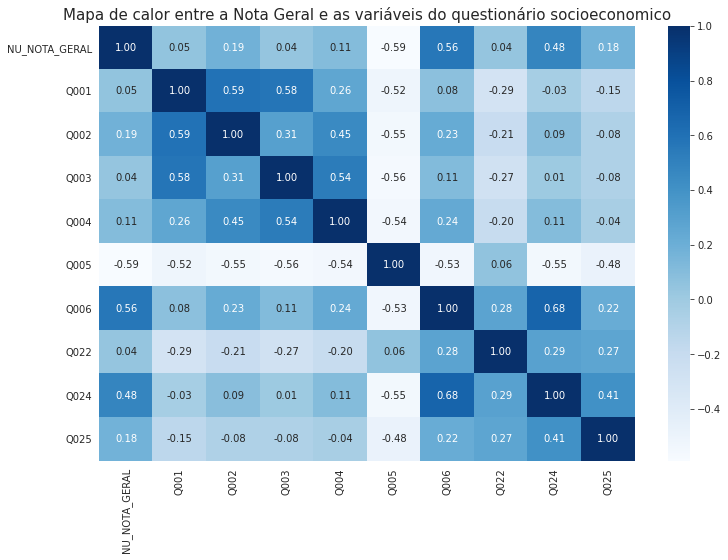

In [ ]:
mapa_de_calor(df_final, ["NU_NOTA_GERAL", "Q001",	"Q002", "Q003",	"Q004",	"Q005", "Q006", "Q022", "Q024" ,"Q025"], (12,8))
plt.title("Mapa de calor entre a Nota Geral e as variáveis do questionário socioeconomico", size=15)
plt.show()

Pela correlação acima, as variáveis socioeconomicas que mais influenciam são a Q005 (Quantas pessoas moram na sua casa) e a Q006 (Renda familiar), a Q024 (Se possui computador) também possui uma correlação positiva.
Ou seja:
- Quanto menos pessoas moram na sua residência, maior a sua nota;
- Quanto maior a sua renda, maior a sua nota;
- Quanto mais computadores você possui em casa, um reflexo da renda, maior a sua nota.

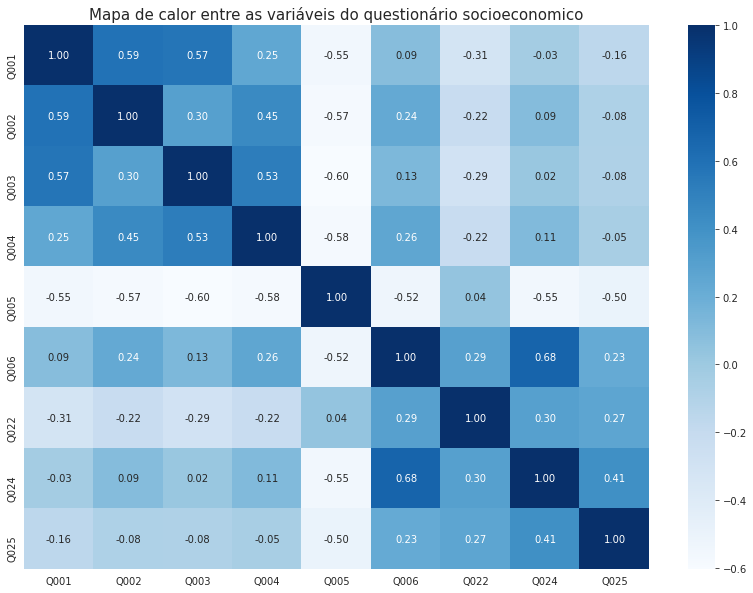

In [ ]:
mapa_de_calor(df_final, ["Q001",	"Q002", "Q003",	"Q004",	"Q005", "Q006", "Q022", "Q024" ,"Q025"], (14,10))
plt.title("Mapa de calor entre as variáveis do questionário socioeconomico", size=15)
plt.show()

Algumas observações retiradas ao comparar as correlações das variaveis socioeconomicas entre si:
- É possível identificar que homens e mulheres com grau de escolaridade similar se relacionam através da correlação entre Q001 e Q002;
- Comparando o Q001 e o Q003 percebemos que a tendência é que: quanto maior o grau de escolaridade do homem, mais valoroso é o seu trabalho. Porém, se observarmos o Q002 e o Q004, percebemos que essa relação é menor para as mulheres, pois a correlação é de apenas 0.45;
- Quanto maior o grau de escolaridade e renda, menor o número de filhos (ou pessoas na residência) (Q005);
- As profissões do homem e da mulher possuem uma correlação positiva de 0.24 e 0.25 com relação a renda da família. Apesar de parecer pouco, isso pode indicar uma coisa: existem 17 opções de faixa de renda no questionário socioeconomico, desde nenhuma renda até mais de R$ 19.960,00, e aparentemente, pouquíssimas pessoas chegam a essa renda. Isso mostra um pouco do reflexo do Brasil, onde muitos têm pouco, e poucos têm muito.


Abaixo, temos uma relação das redações nota 1000 e nota 0, por renda:

In [ ]:
# Descobrindo o total de alunos com redação nota 1000
print("Total de alunos nota 1000: ", end="") 
len(df_final.query("NU_NOTA_REDACAO == 1000"))

Total de alunos nota 1000: 

50

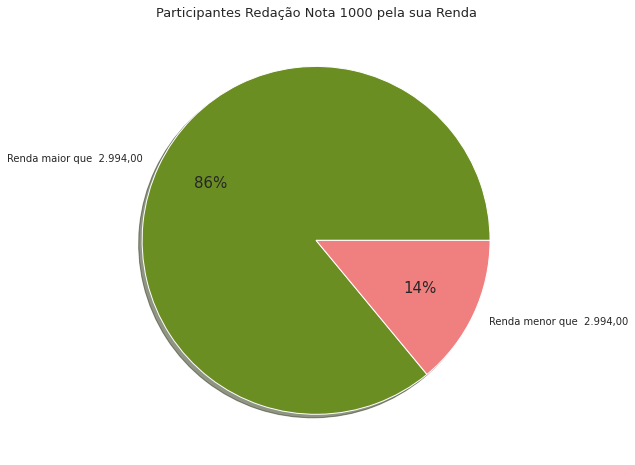

In [ ]:
plt.figure(figsize=(10,8))
plt.pie([len(df_final.query("NU_NOTA_REDACAO == 1000 & Q006 >= 6")["Q006"]), len(df_final.query("NU_NOTA_REDACAO == 1000 & Q006 < 6")["Q006"])], labels=["Renda maior que  2.994,00","Renda menor que  2.994,00"], colors=["olivedrab", "lightcoral"], shadow=True)
plt.annotate(str(round(len(df_final.query("NU_NOTA_REDACAO == 1000 & Q006 >= 6")["Q006"])/len(df_final.query("NU_NOTA_REDACAO == 1000")["Q006"])*100))+"%",
             xy= (-0.7,0.3), size=15)
plt.annotate(str(round(len(df_final.query("NU_NOTA_REDACAO == 1000 & Q006 < 6")["Q006"])/len(df_final.query("NU_NOTA_REDACAO == 1000")["Q006"])*100))+"%",
             xy= (0.5,-0.3), size=15)
plt.title("Participantes Redação Nota 1000 pela sua Renda", size=13)
plt.show()

Podemos ver uma clara discrepância nas redações nota 1000: as pessoas com mais renda têm mais facilidade para isso. 

Agora, vamos analisar um pouco mais esses 14% com a renda menor que 2.994,00 reais


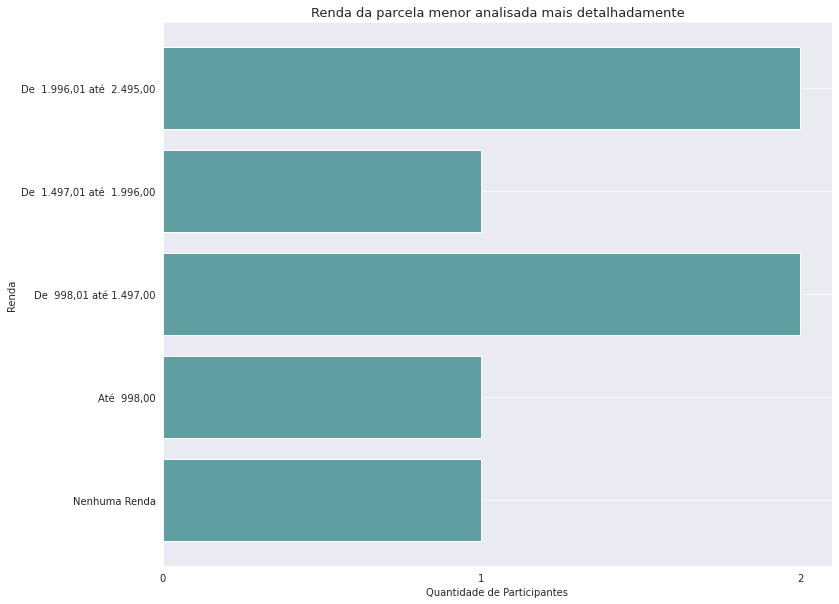

In [ ]:
plt.figure(figsize=(12,10))
plt.barh(df_final.query("NU_NOTA_REDACAO == 1000 & Q006 < 6")["Q006"].value_counts().index, 
        df_final.query("NU_NOTA_REDACAO == 1000 & Q006 < 6")["Q006"].value_counts().values,
        color="cadetblue")
plt.yticks([1,2,3,4,5], ["Nenhuma Renda", "Até  998,00", "De  998,01 até 1.497,00", "De  1.497,01 até  1.996,00", "De  1.996,01 até  2.495,00"])
plt.xticks([0,1,2])
plt.xlabel("Quantidade de Participantes")
plt.ylabel("Renda")
plt.title("Renda da parcela menor analisada mais detalhadamente", size=13)
plt.grid(axis="x")
plt.show()


Mesmo dentre as pessoas com "Menor renda", a maioria está distribuida na parte com mais renda. Agora, comparando a parte com a maior renda:

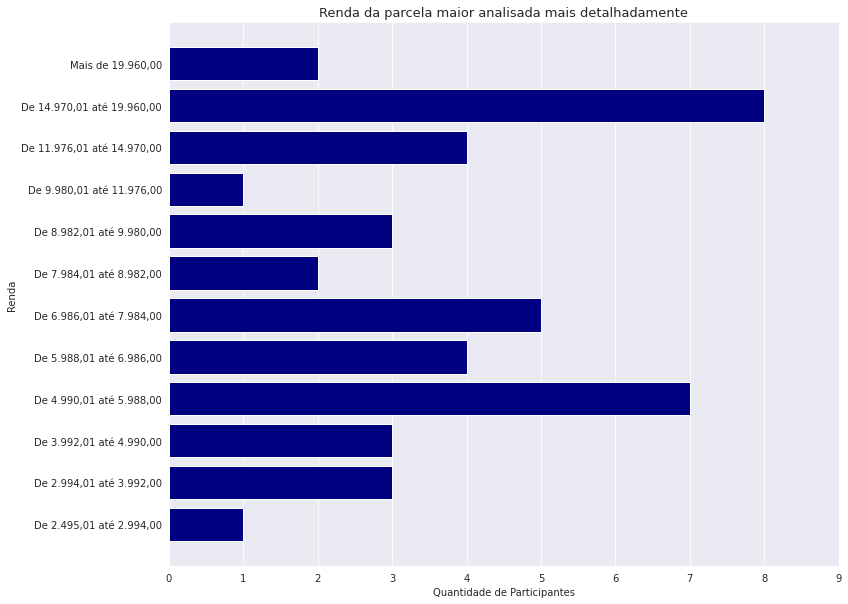

In [ ]:
plt.figure(figsize=(12,10))
plt.barh(df_final.query("NU_NOTA_REDACAO == 1000 & Q006 >= 6")["Q006"].value_counts().index, 
        df_final.query("NU_NOTA_REDACAO == 1000 & Q006 >= 6")["Q006"].value_counts().values,
        color="navy")

plt.yticks(np.arange(6,18), ["De 2.495,01 até 2.994,00", 
                             "De 2.994,01 até 3.992,00", 
                             "De 3.992,01 até 4.990,00",
                             "De 4.990,01 até 5.988,00", 
                             "De 5.988,01 até 6.986,00",
                             "De 6.986,01 até 7.984,00",
                             "De 7.984,01 até 8.982,00",
                             "De 8.982,01 até 9.980,00",
                             "De 9.980,01 até 11.976,00",
                             "De 11.976,01 até 14.970,00",
                             "De 14.970,01 até 19.960,00", 
                             "Mais de 19.960,00"])
plt.xticks(np.arange(0,10))
plt.xlabel("Quantidade de Participantes")
plt.ylabel("Renda")
plt.title("Renda da parcela maior analisada mais detalhadamente", size=13)
plt.grid(axis="y")
plt.show()


Aqui, vemos que o grupo de pessoas com renda de 14.970,01 até 19.960,00 é o grupo com mais notas 1000. O intervalo que vai de 4.990,01 até 9.980,00 também é bem grande, mostrando mais uma vez a relação diretamente proporcional entre nota e renda.

In [ ]:
# Descobrindo o total de alunos com redação nota 1000
print("Total de alunos nota 0: ", end="") 
len(df_final.query("NU_NOTA_REDACAO == 0"))

Total de alunos nota 0: 

84699

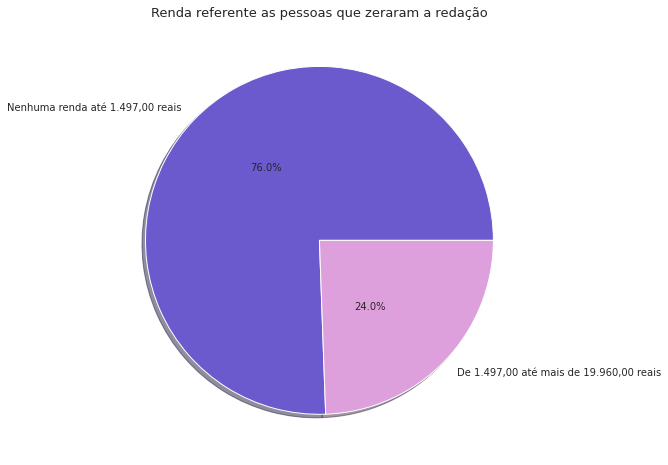

In [ ]:
plt.figure(figsize=(10,8))
plt.pie([df_final.query("NU_NOTA_REDACAO == 0")["Q006"].value_counts(normalize=True)[:3].sum(), df_final.query("NU_NOTA_REDACAO == 0")["Q006"].value_counts(normalize=True)[3:].sum()],
        shadow=True, colors=["slateblue", "plum"], labels=["Nenhuma renda até 1.497,00 reais", "De 1.497,00 até mais de 19.960,00 reais"])
plt.annotate(str(np.around(df_final.query("NU_NOTA_REDACAO == 0")["Q006"].value_counts(normalize=True)[3:].sum()*100))+"%", xy=(.2,-.4))
plt.annotate(str(np.around(df_final.query("NU_NOTA_REDACAO == 0")["Q006"].value_counts(normalize=True)[:3].sum()*100))+"%", xy=(-.4,.4))
plt.title("Renda referente as pessoas que zeraram a redação", size=13)
plt.show()

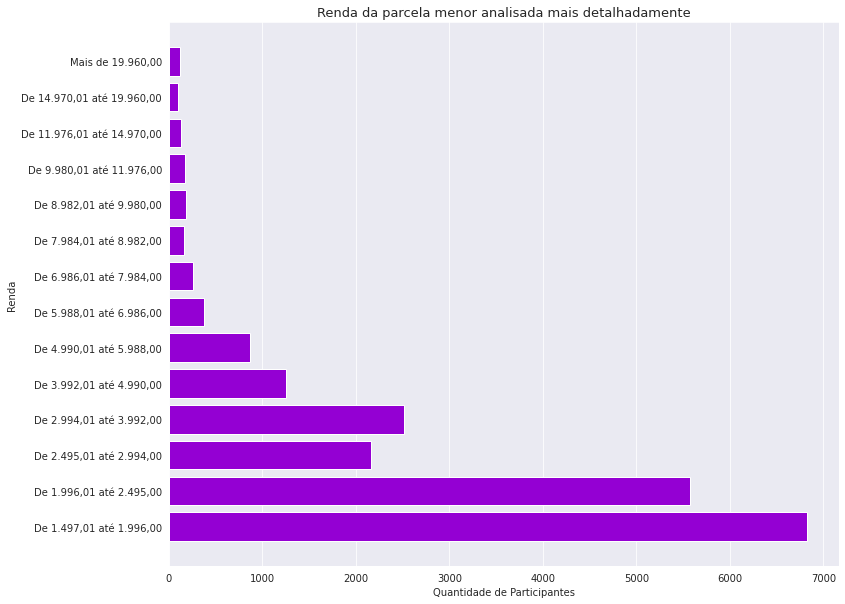

In [ ]:
plt.figure(figsize=(12,10))
plt.barh(df_final.query("NU_NOTA_REDACAO == 0")["Q006"].value_counts()[3:].index, df_final.query("NU_NOTA_REDACAO == 0")["Q006"].value_counts()[3:], color="darkviolet")
plt.yticks(np.arange(4,19), ["De 1.497,01 até 1.996,00",
                             "De 1.996,01 até 2.495,00",
                             "De 2.495,01 até 2.994,00", 
                             "De 2.994,01 até 3.992,00", 
                             "De 3.992,01 até 4.990,00",
                             "De 4.990,01 até 5.988,00", 
                             "De 5.988,01 até 6.986,00",
                             "De 6.986,01 até 7.984,00",
                             "De 7.984,01 até 8.982,00",
                             "De 8.982,01 até 9.980,00",
                             "De 9.980,01 até 11.976,00",
                             "De 11.976,01 até 14.970,00",
                             "De 14.970,01 até 19.960,00", 
                             "Mais de 19.960,00"])
plt.xlabel("Quantidade de Participantes")
plt.ylabel("Renda")
plt.title("Renda da parcela menor analisada mais detalhadamente", size=13)
plt.grid(axis="y")
plt.show()

#### Cor/Raça

In [ ]:
df_final["TP_COR_RACA"].value_counts()

#0: Não soube responder
#1: Branco 
#2: Preto
#3: Pardo
#4: Amarelo
#5: Indigena

3    1486375
1    1121929
2     413598
4      71777
0      61521
5      19108
Name: TP_COR_RACA, dtype: int64

Pela contagem acima podemos perceber uma predominância de pessoas autodeclaradas pardas e brancas

Abaixo, nós plotamos os boxplots das notas por Cor/Raça

In [ ]:
# datasets por raça
nao_declarado = df_final.query("TP_COR_RACA == 0")
branco = df_final.query("TP_COR_RACA == 1")
preto = df_final.query("TP_COR_RACA == 2")
pardo = df_final.query("TP_COR_RACA == 3")
amarelo = df_final.query("TP_COR_RACA == 4")
indigena = df_final.query("TP_COR_RACA == 5")

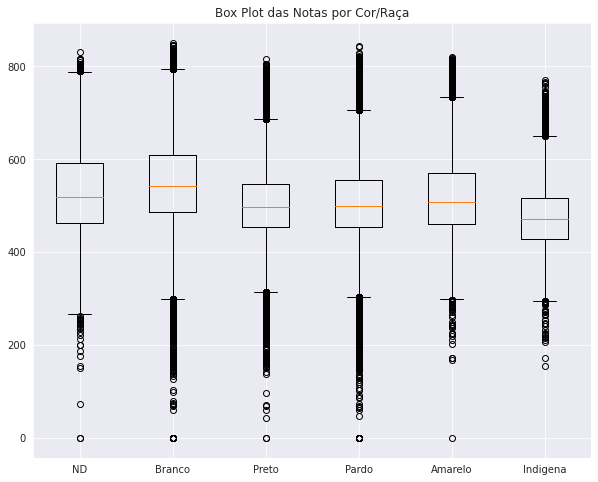

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot([nao_declarado["NU_NOTA_GERAL"], branco["NU_NOTA_GERAL"], preto["NU_NOTA_GERAL"],\
             pardo["NU_NOTA_GERAL"], amarelo["NU_NOTA_GERAL"], indigena["NU_NOTA_GERAL"]])
plt.xticks([1,2,3,4,5,6], ["ND", "Branco", "Preto", "Pardo", "Amarelo", "Indigena"])
plt.title("Box Plot das Notas por Cor/Raça")
plt.show()

Observações:
- No gráfico observado, nenhum indigena zerou a prova;
- A mediana dos indigenas também é a menor de todas;
- O 3º  quartil das pessoas não declaradas é um dos maiores, e sua mediana só não supera a das pessoas brancas. Isso é ruim, pois temos uma estatística que não reflete a realidade;
- Para ser considerado um outlier dentre as pessoas brancas, a sua nota geral deve ser maior que 800, enquanto para as pessoas pretas, pardas e amarelas, a nota deve ser maior que 700; 

Agora, vamos plotar um Gráfico de barras comparando as modas das rendas por Cor/Raça. Ou seja, a quantidade de renda que mais se repete para cada Cor/Raça

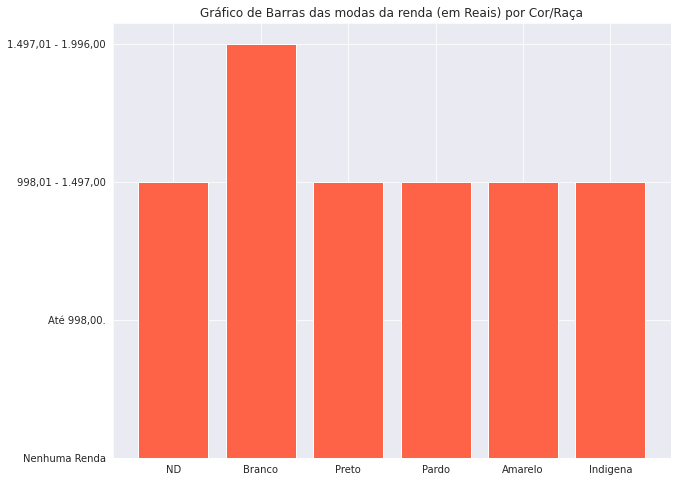

In [ ]:
dfs = [nao_declarado, branco, preto, pardo, amarelo, indigena]
plt.figure(figsize=(10,8))
plt.bar(["ND", "Branco", "Preto", "Pardo", "Amarelo", "Indigena"], [calcula_moda(i,"Q006") for i in dfs], color='tomato')
plt.yticks([0,1,2,3], ["Nenhuma Renda", "Até 998,00.", "998,01 - 1.497,00", "1.497,01 - 1.996,00"])
plt.title("Gráfico de Barras das modas da renda (em Reais) por Cor/Raça")
plt.show()

Observamos que há um padrão onde a maioria da população recebe dentre 998,01 reais e 1.497,00 reais. E os brancos recebem acima disso.

Abaixo, temos uma histograma que mostra a nota de cada matéria e a respectiva quantidade de pessoas que a tiraram, dividido por Cor/Raça

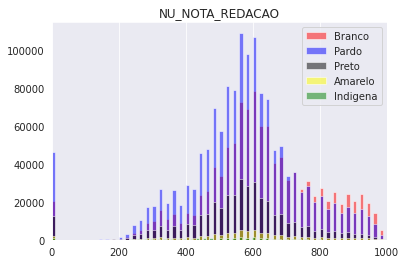

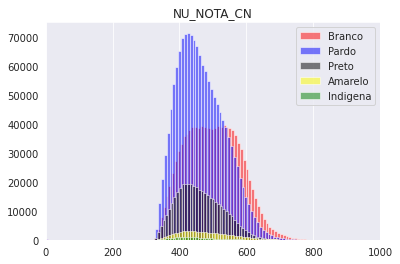

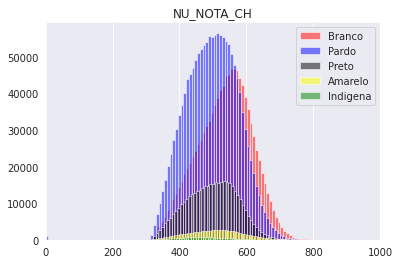

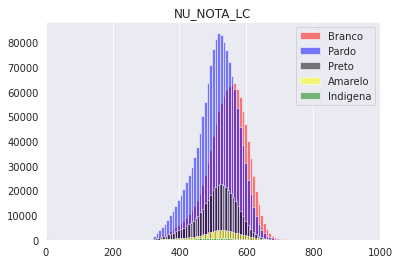

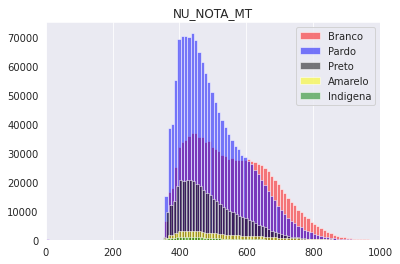

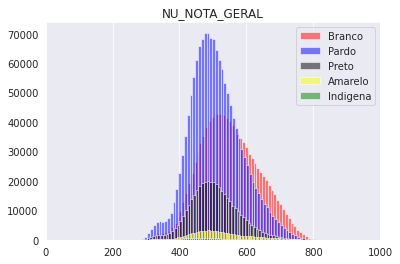

In [ ]:
for i in ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_GERAL']:
  plota_hist_por_raca(i)

Analisando os histogramas acima, podemos perceber que as notas de Linguagens e Códigos possuem uma distribuição parecida entre as Cores/Raças; 

Podemos perceber também que a nota de matemática é a que tem mais pessoas com notas abaixo de 500;

A redação é a que mais se aproxima de uma distribuição normal;

Podemos observar que as notas de matemática e redação são as que mais se aproximam da nota 1000;

#### Redação

Analisando um pouco mais a fundo a redação, nós vamos tentar verificar se existe alguma competência mais fácil ou difícil de se tirar a nota máxima

Legenda das competencias:


* Competência I: demonstrar domínio da norma culta da língua portuguesa
* Competência II: compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo
* Competência III: selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista
* Competência IV: demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação
* Competência V: elaborar proposta de solução para o problema abordado, mostrando respeito aos valores humanos e considerando a diversidade sociocultural


In [ ]:
#criando um dataset apenas com as notas máximas de cada redação

li_comp = [df_final[i].value_counts()[200] for i in ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]]

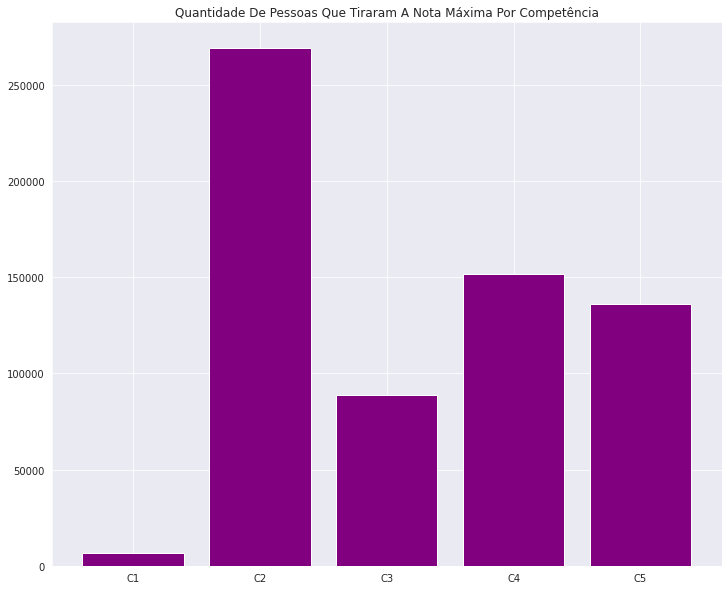

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(["C1","C2","C3","C4","C5"],li_comp, color="purple")
plt.title(str("quantidade de pessoas que tiraram a nota máxima por competência").title())
plt.show()

O gráfico acima é, no mínimo, curioso ao mostrar que a competência em que as pessoas menos tiram nota máxima é a Competência 1, que se refere ao domínio da escrita formal da língua portuguesa;

Enquanto a competência 2, compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo, é as que os estudantes mais conseguem tirar a nota máxima.

Agora, aqueles que tiraram 0 em cada competência

In [ ]:
li_comp2 = [df_final[i].value_counts()[0.0] for i in ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]]

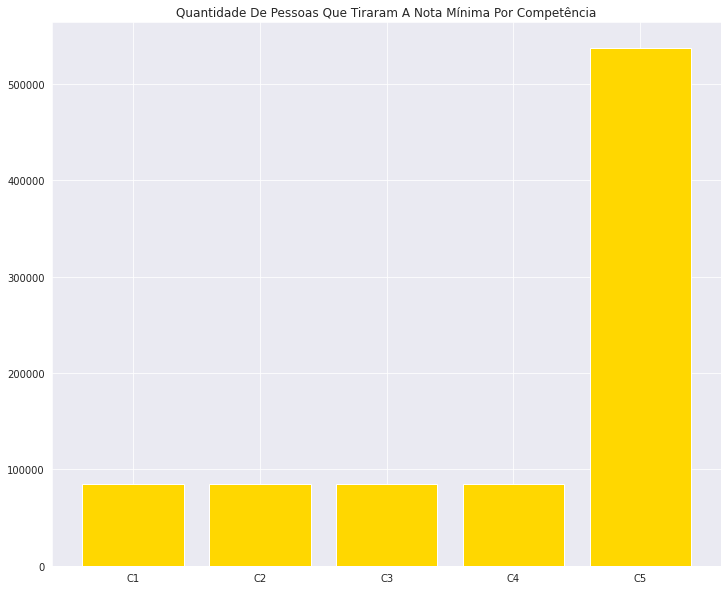

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(["C1","C2","C3","C4","C5"],li_comp2, color="gold")
plt.title(str("quantidade de pessoas que tiraram a nota mínima por competência").title())
plt.show()

A competência 5, a que mais teve zeros, é a competência que julga se o aluno conseguiu elaborar proposta de solução para o problema abordado, mostrando respeito aos valores humanos e considerando a diversidade sociocultural. Isso acontece muito possivelmente porque as pessoas acabam tendo a nota zerada por não respeitarem os direitos humanos em sua proposta de intervenção. 




Agora vamos analisar a nota da redação no geral.

Os motivos pelos quais as pessoas zeraram a redação, são:

2: Anulada

3: Cópia Texto Motivador

4: Em branco

6: Fuga ao tema

7: Não atendimento ao tipo textual

8: Texto insuficiente

9: Parte desconectada

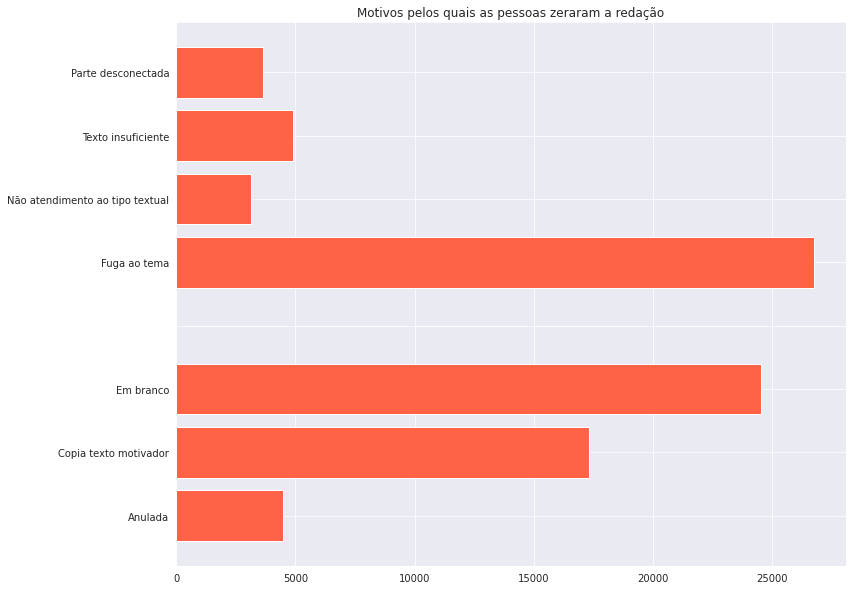

In [ ]:
redacao_zero = df_final.query('NU_NOTA_REDACAO == 0')

plt.figure(figsize=(12,10))
plt.barh(redacao_zero['TP_STATUS_REDACAO'].value_counts().index, redacao_zero['TP_STATUS_REDACAO'].value_counts(), color='tomato')
plt.yticks([2, 3, 4, 5, 6, 7, 8, 9], ["Anulada", "Copia texto motivador", "Em branco", "", "Fuga ao tema", 
                                      "Não atendimento ao tipo textual", "Texto insuficiente", "Parte desconectada"])
plt.title("Motivos pelos quais as pessoas zeraram a redação")
plt.show()

Conseguimos ver claramente que os maiores motivos do recebimento de zeros na redação é a Fuga ao tema e deixar a redação em branco. 
Uma coisa interessante que podemos perceber é que, ao passo que a competência 2 é aquela onde os alunos mais conseguem tirar nota máxima, ela também é a que mais zera redações, pois a fuga ao tema é diretamente ligada a proposta da 2° competência.

Analisando um pouco da questão da internet:

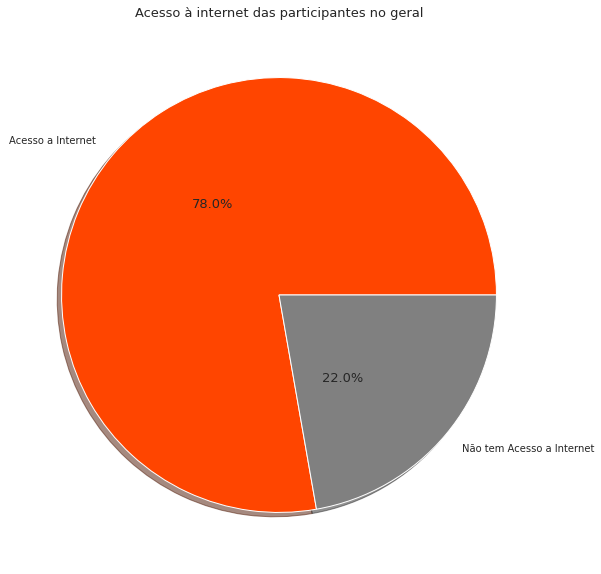

In [ ]:
plt.figure(figsize=(12,10))
plt.pie(df_final["Q025"].value_counts(), shadow=True, colors=["orangered", "gray"], labels=["Acesso a Internet", "Não tem Acesso a Internet"])
plt.annotate(str(np.around(df_final["Q025"].value_counts(normalize=True)*100)[1])+"%", xy=(.2,-.4),size=13)
plt.annotate(str(np.around(df_final["Q025"].value_counts(normalize=True)*100)[2])+"%", xy=(-.4,.4),size=13)
plt.title("Acesso à internet das participantes no geral", size=13)
plt.show()

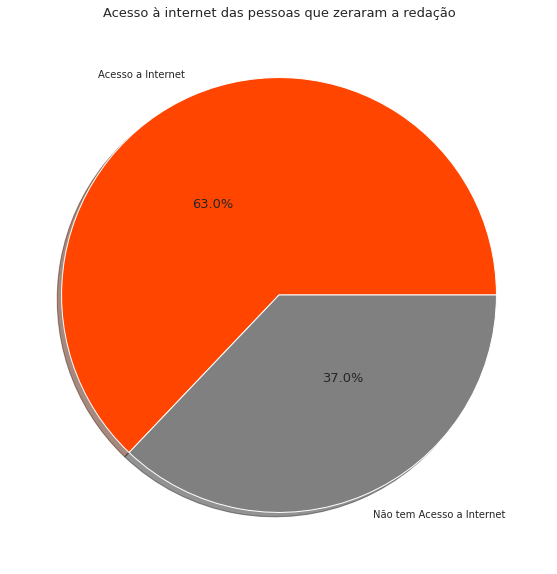

In [ ]:
plt.figure(figsize=(12,10))
plt.pie(redacao_zero["Q025"].value_counts(), shadow=True, colors=["orangered", "gray"], labels=["Acesso a Internet", "Não tem Acesso a Internet"])
plt.annotate(str(np.around(redacao_zero["Q025"].value_counts(normalize=True)*100)[1])+"%", xy=(.2,-.4),size=13)
plt.annotate(str(np.around(redacao_zero["Q025"].value_counts(normalize=True)*100)[2])+"%", xy=(-.4,.4),size=13)
plt.title("Acesso à internet das pessoas que zeraram a redação", size=13)
plt.show()

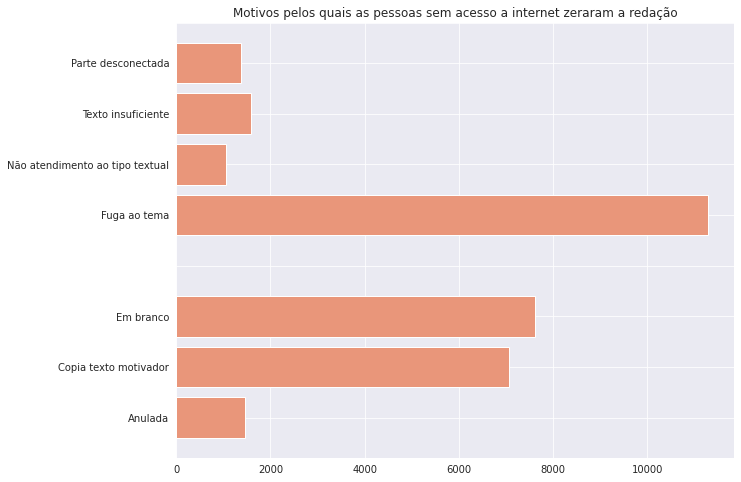

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(redacao_zero.query("Q025 == 1")['TP_STATUS_REDACAO'].value_counts().index, redacao_zero.query("Q025 == 1")['TP_STATUS_REDACAO'].value_counts(), color='darksalmon')
plt.yticks([2, 3, 4, 5, 6, 7, 8, 9], ["Anulada", "Copia texto motivador", "Em branco", "", "Fuga ao tema", 
                                      "Não atendimento ao tipo textual", "Texto insuficiente", "Parte desconectada"])
plt.title("Motivos pelos quais as pessoas sem acesso a internet zeraram a redação")
plt.show()

Percebe-se que os motivos são basicamente os mesmos entre o conjunto geral de pessoas que zeraram a redação e o sub-conjunto das pessoas que zeraram a redação e não possuem acesso a internet

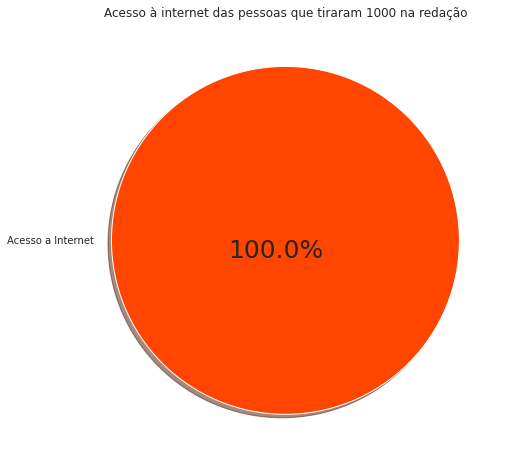

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(df_final.query('NU_NOTA_REDACAO == 1000')["Q025"].value_counts(), shadow=True, colors=["orangered"],labels=["Acesso a Internet"])
plt.annotate(str(np.around(df_final.query('NU_NOTA_REDACAO == 1000')["Q025"].value_counts(normalize=True)*100)[2])+"%", xy=(-.33,-.1), size=25)
plt.title("Acesso à internet das pessoas que tiraram 1000 na redação")
plt.show()

Percebe-se que 37% é um número alto no que tange o acesso a internet, que hoje em dia se tornou tão essencial quanto a energia eletrica. E prova disso é que 100% das pessoas que tiram 1000 na redação tinham internet em casa (mesmo um dos participantes não tendo renda fixa). Isso talvez indique uma grande ajuda das redes nos estudos dos alunos (e talvez isso se mostre de forma mais clara no enem 2020, muito por conta da Pandemia do Coronavirus) 

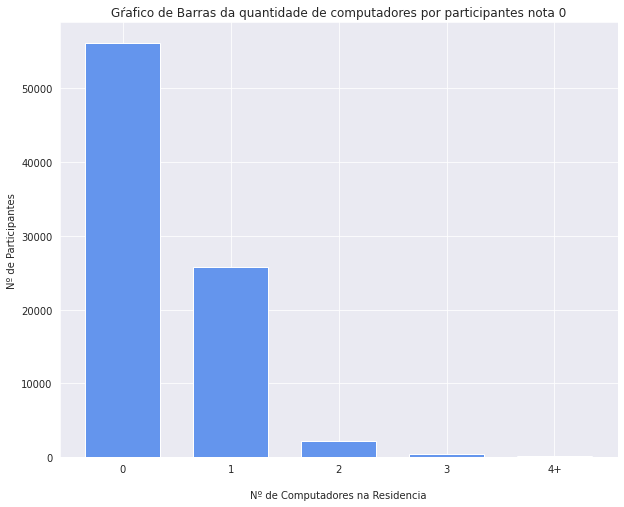

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(redacao_zero["Q024"].value_counts().index,redacao_zero["Q024"].value_counts().values, color="cornflowerblue", width=0.7)
plt.xticks([1,2,3,4,5], ["0","1","2","3","4+"])
plt.xlabel("\nNº de Computadores na Residencia")
plt.ylabel("Nº de Participantes")
plt.title("Gŕafico de Barras da quantidade de computadores por participantes nota 0", size=12)
plt.show()

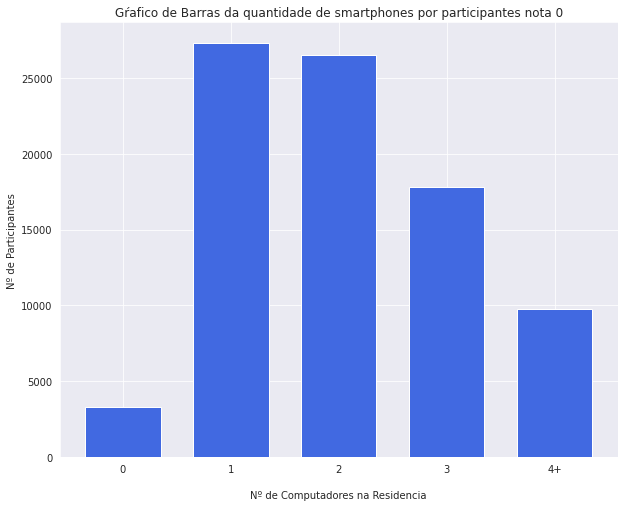

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(redacao_zero["Q022"].value_counts().index,redacao_zero["Q022"].value_counts().values, color="royalblue", width=0.7)
plt.xticks([1,2,3,4,5], ["0","1","2","3","4+"])
plt.xlabel("\nNº de Computadores na Residencia")
plt.ylabel("Nº de Participantes")
plt.title("Gŕafico de Barras da quantidade de smartphones por participantes nota 0", size=12)
plt.show()

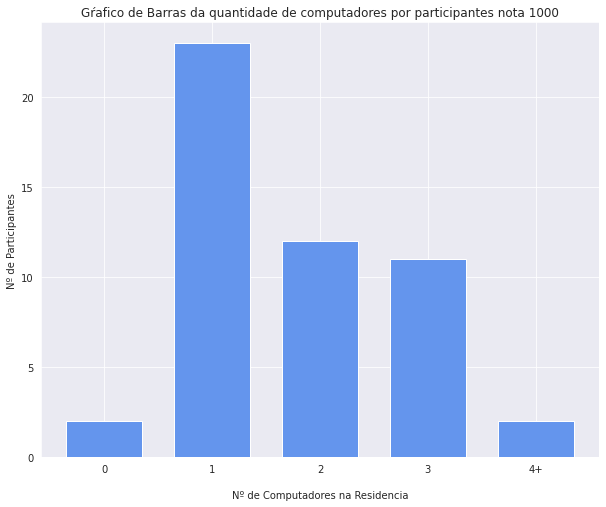

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df_final.query('NU_NOTA_REDACAO == 1000')["Q024"].value_counts().index,df_final.query('NU_NOTA_REDACAO == 1000')["Q024"].value_counts().values, color="cornflowerblue", width=0.7)
plt.xticks([1,2,3,4,5], ["0","1","2","3","4+"])
plt.xlabel("\nNº de Computadores na Residencia")
plt.ylabel("Nº de Participantes")
plt.title("Gŕafico de Barras da quantidade de computadores por participantes nota 1000", size=12)
plt.show()

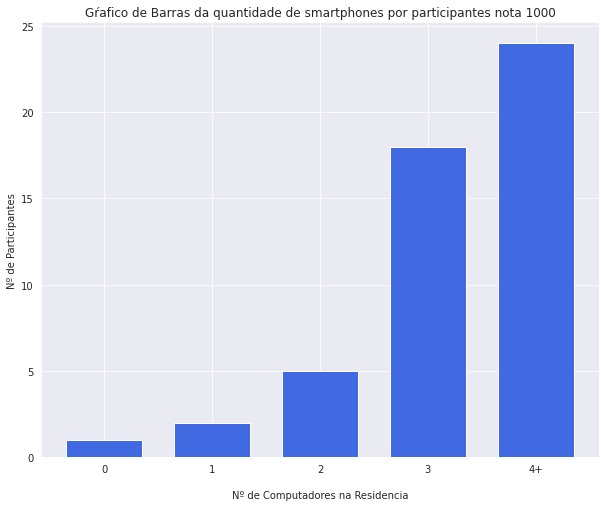

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df_final.query('NU_NOTA_REDACAO == 1000')["Q022"].value_counts().index,df_final.query('NU_NOTA_REDACAO == 1000')["Q022"].value_counts().values, color="royalblue", width=0.7)
plt.xticks([1,2,3,4,5], ["0","1","2","3","4+"])
plt.xlabel("\nNº de Computadores na Residencia")
plt.ylabel("Nº de Participantes")
plt.title("Gŕafico de Barras da quantidade de smartphones por participantes nota 1000",size=12)
plt.show()

a maioria das pessoas que zeraram, não tinha computadores em casa. O que pode nos dar a informação de que mesmo com a internet, o computador (seja ele de mesa ou notebook) se mostra importante para o estudo dos participantes. Principalmente quando analisa-se os participantes nota 1000, onde a maioria possui ao menos 1 computador em sua residencia.

#### Dependência da escola

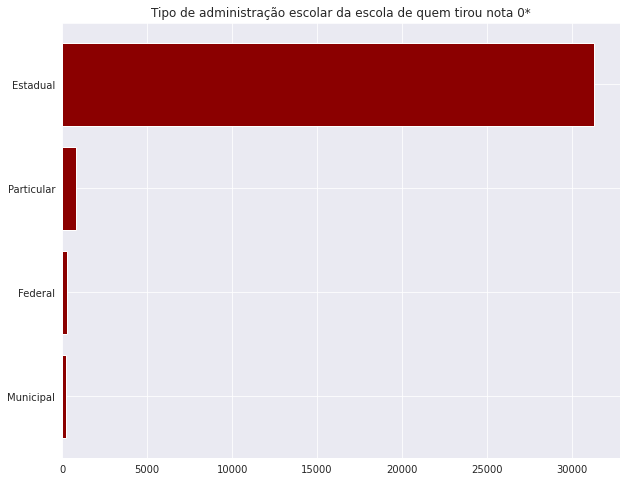

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(["Municipal","Federal","Particular","Estadual"], redacao_zero["TP_DEPENDENCIA_ADM_ESC"].value_counts(ascending=True).values, color="darkred")
plt.title("Tipo de administração escolar da escola de quem tirou nota 0*")
plt.show()

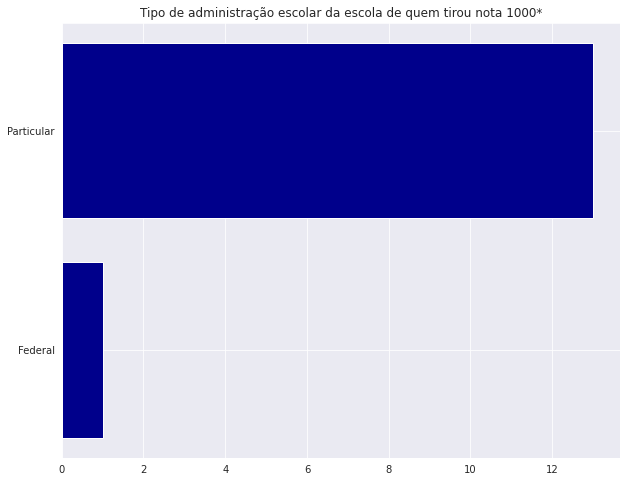

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(["Federal","Particular"],df_final.query("NU_NOTA_REDACAO == 1000")["TP_DEPENDENCIA_ADM_ESC"].value_counts(ascending=True).values, color="darkblue")
plt.title("Tipo de administração escolar da escola de quem tirou nota 1000*")
plt.show()

É de se notar nesse gráfico a eficiencia das escolas particulares/federais. E há uma certa ineficiencia (ou até mesmo impotencia) das escolas estaduais/municipais competirem com as outras administrações.

*Existem muitos valores null na variavel "TP_DEPENDENCIA_ADM_ESC"

Criando datasets para definir quem estuda em qual escola

In [ ]:
estadual = df_final.query("TP_DEPENDENCIA_ADM_ESC == 2.0")
privada = df_final.query("TP_DEPENDENCIA_ADM_ESC == 4.0")
federal = df_final.query("TP_DEPENDENCIA_ADM_ESC == 1.0")
municipal = df_final.query("TP_DEPENDENCIA_ADM_ESC == 3.0")

[]

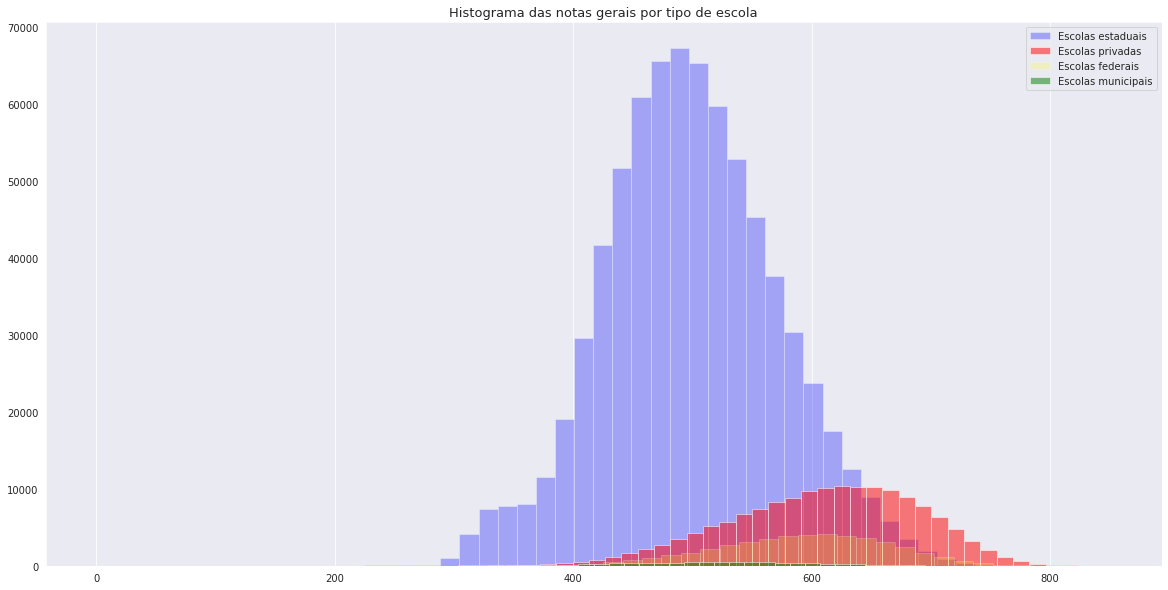

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(estadual["NU_NOTA_GERAL"], alpha=0.3, color="blue", bins=50, label='Escolas estaduais')
plt.hist(privada["NU_NOTA_GERAL"], alpha=0.5, color="red", bins=50, label='Escolas privadas')
plt.hist(federal["NU_NOTA_GERAL"], alpha=0.2, color="yellow", bins=50, label='Escolas federais')
plt.hist(municipal["NU_NOTA_GERAL"], alpha=0.5, color="green", bins=50, label='Escolas municipais')
plt.grid(axis="y")
plt.legend()
plt.title("Histograma das notas gerais por tipo de escola", size=13)
plt.plot()

## Considerações finais

Com base em tudo que vimos, conseguimos inferir que a renda é o fator que mais influencia na nota, sendo clara a relação entre maior renda, e maiores chances de se obter uma boa nota. Quanto a cor/raça do indivíduo, não conseguimos perceber uma relevância tão significativa quanto a renda.  E, ao pararmos para analisar a redação, uma das mais importantes partes do exame, vemos que muitas pessoas ainda erram as partes gramaticais, e que existe uma dificuldade na interpretação dos textos por parte dos alunos, o que pode representar uma das maiores falhas do nosso sistema educacional brasileiro, em sua maior parte nas escolas estaduais (outro reflexo da renda, pois as pessoas de maior renda tendem a ir para escolas particulares).

#### Curiosidades

##### Curiosidades aleatórias

In [ ]:
df_final['TP_ESCOLA'].value_counts()

#1: Não informou
#2: Escola pública
#3: Escola privada

1    1957154
2    1009852
3     207302
Name: TP_ESCOLA, dtype: int64

- De acordo com o código acima, 2 milhões de pessoas não informaram se elas vieram de uma escola pública ou privada. 1 milhão respondeu que veio da escola pública, e 200 mil responderam que vieram da escola particular. Agora, fica o questionamento: por que tantas pessoas não informaram de que tipo de escola elas vieram?

In [ ]:
#preto.loc[preto["NOTA_GERAL"].isna()]

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q019,Q022,Q024,Q025,NOTA_GERAL
1137867,Nossa Senhora do Socorro,SE,16,F,2,Aracaju,SE,2,0,2,1.0,0,28017846.0,Aracaju,SE,2.0,1.0,1.0,Nossa Senhora do Socorro,SE,1,1,1,1,504.0,509.0,514.0,516.0,390.9,355.2,479.5,527.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,3,1,5,2,2,2,3,1,1,NaN


- A Vacilona!

Encontramos uma pessoa que estava no padrão: fez a prova como não treineira e foi nos dois dias, porém ela não havia feito a redação. Isso transformou a nota geral dela em NaN e estava dificultando as análises numéricas.

In [ ]:
len(df_final.query('NU_IDADE <= 10'))

46

- A indignação de um estudante: POR QUE DIABOS TEM 46 PESSOAS COM 10 OU MENOS ANOS DE IDADE QUE FIZERAM A PROVA DO ENEM??????????????
E detalhe, elas não são treineiras, elas fizeram a prova pra valer

In [ ]:
df_final.query('NU_IDADE <= 10').head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q019,Q022,Q024,Q025,NU_NOTA_GERAL
114730,Alcântaras,CE,7,M,3,Luziânia,GO,2,0,2,1.0,0,23016876.0,Alcântaras,CE,2.0,1.0,1.0,Sobral,CE,1,1,1,1,505.0,507.0,511.0,518.0,397.1,408.4,481.4,527.7,1.0,100.0,120.0,100.0,100.0,140.0,560.0,2,3,3,1,3,2,2,2,3,2,2,474.92
137995,Axixá,MA,7,M,3,Rosário,MA,2,0,2,1.0,0,21022950.0,Axixá,MA,2.0,1.0,1.0,Icatu,MA,1,1,1,1,504.0,509.0,514.0,516.0,358.3,418.3,435.6,526.4,1.0,120.0,120.0,120.0,120.0,0.0,480.0,3,5,1,1,7,2,2,2,4,1,1,443.72
155670,Salvador,BA,8,M,3,Salvador,BA,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Salvador,BA,1,1,1,1,506.0,510.0,513.0,517.0,601.2,630.1,603.5,652.3,1.0,160.0,200.0,160.0,200.0,200.0,920.0,6,5,4,4,4,6,3,3,1,1,2,681.42
454579,Redenção,CE,3,F,0,Redenção,CE,2,0,2,1.0,0,23494000.0,Redenção,CE,2.0,1.0,1.0,Redenção,CE,1,1,1,1,506.0,509.0,514.0,517.0,394.5,492.1,508.5,560.4,1.0,100.0,140.0,140.0,120.0,160.0,660.0,3,3,1,1,5,2,2,2,2,1,1,523.10
528668,Paranatinga,MT,7,F,1,Paranatinga,MT,2,0,2,1.0,0,51017652.0,Paranatinga,MT,2.0,1.0,1.0,Paranatinga,MT,1,1,1,1,505.0,509.0,514.0,518.0,442.6,469.8,549.9,467.9,1.0,140.0,120.0,120.0,120.0,100.0,600.0,6,5,4,2,4,9,3,2,4,1,2,506.04


No código acima, separamos os participantes com 10 ou menos anos de idade.

- Dentre as crianças, temos uma prodigío:

In [ ]:
df_final.query('NU_IDADE <= 10 & NU_NOTA_GERAL > 700')

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q019,Q022,Q024,Q025,NU_NOTA_GERAL
1699851,Belo Horizonte,MG,8,F,3,João Pessoa,PB,2,0,3,1.0,0,31005037.0,Belo Horizonte,MG,4.0,1.0,1.0,Belo Horizonte,MG,1,1,1,1,505.0,510.0,513.0,518.0,596.5,653.5,635.8,859.0,1.0,160.0,200.0,200.0,200.0,200.0,960.0,7,6,5,4,2,17,3,2,3,3,2,740.96


Explicando o questionário socioeconomico:
- Q006: 17 (A renda familiar dela é de mais de R$ 19.960,00)
- Q001: 7 (O pai completou a pós graduação)
- Q002: 6 (A mãe completou a faculdade, mas não completou a pós graduação)

In [ ]:
df_final.query('NU_IDADE <= 4')

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q019,Q022,Q024,Q025,NU_NOTA_GERAL
454579,Redenção,CE,3,F,0,Redenção,CE,2,0,2,1.0,0,23494000.0,Redenção,CE,2.0,1.0,1.0,Redenção,CE,1,1,1,1,506.0,509.0,514.0,517.0,394.5,492.1,508.5,560.4,1.0,100.0,140.0,140.0,120.0,160.0,660.0,3,3,1,1,5,2,2,2,2,1,1,523.10
687038,Manaus,AM,3,F,3,Itacoatiara,AM,2,0,2,1.0,0,13083295.0,Manaus,AM,2.0,1.0,1.0,Manaus,AM,1,1,1,1,503.0,509.0,514.0,515.0,415.0,485.8,545.5,410.0,1.0,100.0,120.0,120.0,80.0,80.0,500.0,3,4,2,2,5,2,2,1,3,1,1,471.26
849885,Alagoa Nova,PB,2,F,1,Alagoa Nova,PB,2,0,2,1.0,0,25127519.0,Campina Grande,PB,4.0,1.0,1.0,Alagoa Nova,PB,1,1,1,1,506.0,507.0,511.0,517.0,434.1,579.1,515.0,500.6,1.0,160.0,180.0,200.0,200.0,160.0,900.0,2,6,2,4,7,6,3,3,5,2,2,585.76
891969,Medeiros Neto,BA,3,M,3,Medeiros Neto,BA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Medeiros Neto,BA,1,1,1,1,503.0,507.0,511.0,515.0,580.9,647.3,599.6,583.6,1.0,140.0,120.0,120.0,100.0,120.0,600.0,2,2,6,6,4,3,2,1,4,1,1,602.28
1557111,São Paulo,SP,4,F,2,São Paulo,SP,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,São Paulo,SP,1,1,1,1,503.0,509.0,514.0,515.0,365.0,505.5,548.3,511.1,1.0,120.0,120.0,120.0,120.0,0.0,480.0,4,5,4,2,5,3,2,2,4,1,2,481.98


- Os bebês prodígios:

OBS: Veríficamos e não há idade limite para se fazer o ENEM

##### Análisando o território da Paraíba e notas de CDIA

Iniciamos nossa pesquisa exploratória tentando entender um pouco sobre os dados da Paraíba. Verificamos quem, dentre os alunos não treineiros e que frequentaram os dois dias de prova, passaria no curso de CDIA.

A nota de corte do curso foi de 693.10 na modalidade ampla concorrência e vimos que apenas 2% dos participantes do ENEM da Paraíba passariam no curso (obs: desconsidere que a nota de corte mudaria com o entrar das pessoas)

Dataset contendo apenas as pessoas que são da Paraíba

In [ ]:
df_PB_reais = df_final.query("SG_UF_RESIDENCIA == 'PB'")
df_PB_reais

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q019,Q022,Q024,Q025,NU_NOTA_GERAL
95209,Tavares,PB,21,F,3,Princesa Isabel,PB,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Juazeiro do Norte,CE,1,1,1,1,505.0,508.0,512.0,518.0,620.7,654.7,607.4,831.4,1.0,160.0,180.0,200.0,200.0,180.0,920.0,5,7,4,4,4,5,3,4,5,3,2,726.84
198949,João Pessoa,PB,40,M,3,Rio de Janeiro,RJ,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Uberlândia,MG,1,1,1,1,504.0,510.0,513.0,516.0,485.6,547.5,487.1,461.4,1.0,120.0,120.0,120.0,120.0,140.0,620.0,5,5,2,2,5,3,2,2,2,1,1,520.32
221920,Cabedelo,PB,35,M,0,Belo Horizonte,MG,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Cabedelo,PB,1,1,1,1,503.0,507.0,511.0,515.0,681.1,686.7,610.8,808.9,1.0,120.0,120.0,120.0,140.0,140.0,640.0,5,6,4,4,1,1,2,2,2,2,2,685.50
231367,Pedras de Fogo,PB,19,F,3,Pedras de Fogo,PB,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Itambé,PE,1,1,1,1,504.0,507.0,511.0,516.0,438.6,491.2,548.2,468.9,1.0,180.0,120.0,160.0,180.0,120.0,760.0,3,4,2,2,6,1,2,2,3,2,2,541.38
231484,Imaculada,PB,22,F,3,Patos,PB,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Tabira,PE,1,1,1,1,505.0,507.0,511.0,518.0,389.8,519.6,558.3,502.3,1.0,160.0,180.0,160.0,160.0,180.0,840.0,1,2,1,1,3,2,2,2,2,2,2,562.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174096,Campina Grande,PB,38,M,3,Campina Grande,PB,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Campina Grande,PB,1,1,1,1,504.0,508.0,512.0,516.0,483.5,492.3,524.5,503.6,1.0,80.0,40.0,40.0,80.0,0.0,240.0,4,5,3,2,4,3,2,2,3,1,2,448.78
3174098,João Pessoa,PB,27,M,3,João Pessoa,PB,1,7,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,João Pessoa,PB,1,1,1,1,503.0,510.0,513.0,515.0,507.3,540.2,554.8,582.2,1.0,120.0,120.0,120.0,120.0,120.0,600.0,3,4,3,1,3,3,2,2,4,1,1,556.90
3174099,Taperoá,PB,22,F,3,Taperoá,PB,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Juazeirinho,PB,1,1,1,1,504.0,509.0,514.0,516.0,355.7,346.4,392.9,477.9,1.0,120.0,40.0,40.0,120.0,20.0,340.0,2,7,3,4,4,2,2,2,5,1,2,382.58
3174100,Campina Grande,PB,22,F,1,Campina Grande,PB,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Campina Grande,PB,1,1,1,1,506.0,507.0,511.0,517.0,442.4,522.0,522.0,456.3,1.0,120.0,120.0,100.0,80.0,40.0,460.0,3,5,3,2,3,3,2,3,4,1,2,480.54


Dataset contendo as pessoas não treineiras, que fizeram a prova nos dois dias, são da Paraíba, e tiraram uma nota geral suficiente para passar no curso de Ciência de Dados na Modalidade ampla concorrência

In [ ]:
df_PB_reais_CDIA = df_PB_reais.query("NU_NOTA_GERAL > 693.10")

In [ ]:
#Quantidade de pessoas que passariam: 
print(f'Quandiade de pessoas da Paraíba que fizeram o enem: {len(df_PB_reais)}')
print(f'Quandiade de pessoas da Paraíba que passariam em CDIA: {len(df_PB_reais_CDIA)}')
print(f'Porcentagem de pessoas da Paraíba que fizeram o ENEM e passariam em CDIA: {(len(df_PB_reais_CDIA)/len(df_PB_reais))*100:.2f}%')

Quandiade de pessoas da Paraíba que fizeram o enem: 98570
Quandiade de pessoas da Paraíba que passariam em CDIA: 2536
Porcentagem de pessoas da Paraíba que fizeram o ENEM e passariam em CDIA: 2.57%


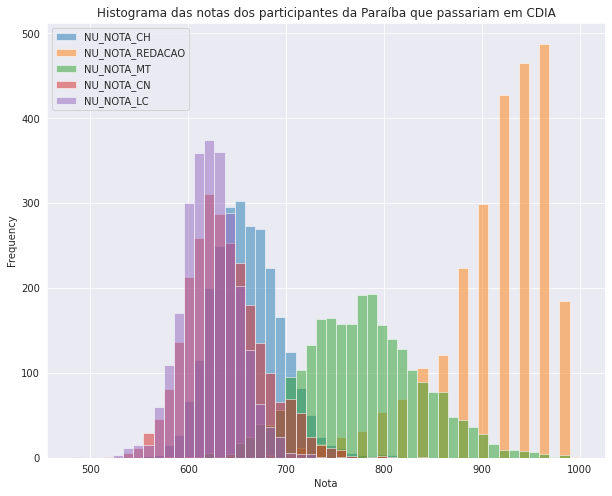

In [ ]:
df_PB_reais_CDIA[['NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC']].plot.hist(alpha=0.5, figsize=(10,8), bins=50)
plt.title("Histograma das notas dos participantes da Paraíba que passariam em CDIA")
plt.xlabel("Nota")
plt.show()

Com base no gráfico acima, verificamos que as pessoas da Paraíba que passariam no curso de CDIA são aquelas pessoas que tiraram maior nota em Matemática e Redação


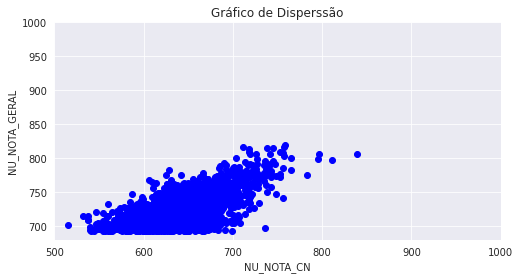

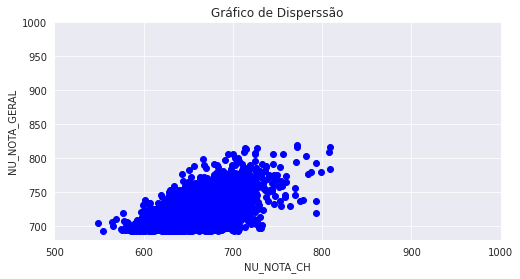

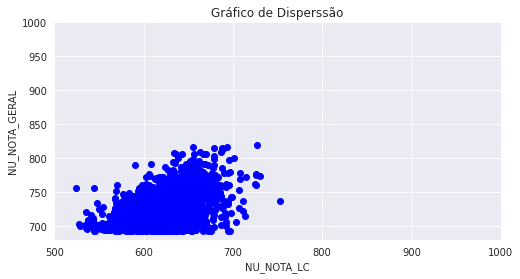

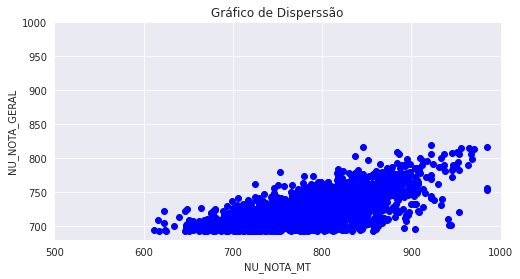

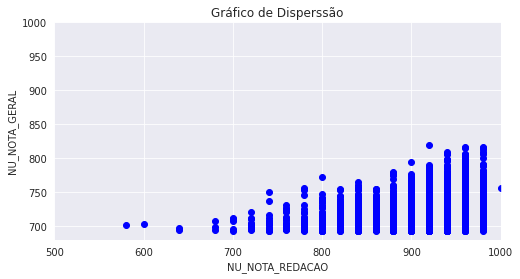

In [ ]:
for i in ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]:
  plota_diperssao(df_PB_reais_CDIA, i, "NU_NOTA_GERAL", figsize=(8,4), ylim=(680, 1000))

Os gráficos de dispersão acima nos mostram que, dentro da amostra escolhida, as notas de Matemática e Redação se revelaram as mais importantes (mais uma vez).